# <b/>1. Import Libararies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import device
from keras import backend
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, UpSampling2D

# <b/>2. Define Dice Coefficient & Loss

In [2]:
def dice_coef(y_true, y_pred):
    
    y_true_f = backend.flatten(y_true)
    y_pred_f = backend.flatten(y_pred)

    intersection = backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1e-7) / (backend.sum(y_true_f) + backend.sum(y_pred_f) + 1e-7)
def dice_coef_loss(y_true, y_pred):
    y_true_f = backend.flatten(y_true)
    y_pred_f = backend.flatten(y_pred)

    intersection = backend.sum(y_true_f * y_pred_f)
    return 1-(2. * intersection + 1e-7) / (backend.sum(y_true_f) + backend.sum(y_pred_f) + 1e-7)

# <b/>3. Data Load

In [3]:
x_train = np.load('dataset/x_train.npy')
x_val = np.load('dataset/x_val.npy')
y_train = np.load('dataset/y_train.npy')
y_val = np.load('dataset/y_val.npy')
print("\tTrain\t\t\tTest\nX\t{}\t{}\nY\t{}\t{}".format(x_train.shape, x_val.shape, y_train.shape, y_val.shape))

	Train			Test
X	(240, 256, 256, 1)	(27, 256, 256, 1)
Y	(240, 256, 256, 1)	(27, 256, 256, 1)


# <b/>4. Create Model

In [4]:
model = Sequential()
# Encoder
## 32x256x256
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
## 64x128x128
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
## 128x64x64
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

# Decoder
## 128x64x64
model.add(UpSampling2D(size=2))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
## 64x128x128
model.add(UpSampling2D(size=2))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
## 32x256x256
model.add(UpSampling2D(size=2))
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())

# Output
model.add(Conv2D(1,kernel_size=1, activation='sigmoid'))
model.compile(optimizer='adam', loss=[dice_coef_loss], metrics=[dice_coef])
model.summary(line_length=120)

Model: "sequential"
________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           
 conv2d (Conv2D)                                      (None, 256, 256, 32)                            320               
                                                                                                                        
 batch_normalization (BatchNormalization)             (None, 256, 256, 32)                            128               
                                                                                                                        
 conv2d_1 (Conv2D)                                    (None, 256, 256, 32)                            9248              
                                                                                                                        
 batch_norma

 batch_normalization_7 (BatchNormalization)           (None, 64, 64, 128)                             512               
                                                                                                                        
 up_sampling2d_1 (UpSampling2D)                       (None, 128, 128, 128)                           0                 
                                                                                                                        
 conv2d_8 (Conv2D)                                    (None, 128, 128, 64)                            73792             
                                                                                                                        
 batch_normalization_8 (BatchNormalization)           (None, 128, 128, 64)                            256               
                                                                                                                        
 conv2d_9 (Conv2D)              

# <b/>5. Learning

In [5]:
epochs = 100
with device('/GPU:2'):
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                        epochs=epochs, batch_size=8)

Epoch 1/100


30/30 [==============================] - 6s 68ms/step - loss: 0.1969 - dice_coef: 0.8031 - val_loss: 0.9997 - val_dice_coef: 3.0607e-04
Epoch 2/100
30/30 [==============================] - 1s 44ms/step - loss: 0.0870 - dice_coef: 0.9130 - val_loss: 0.9742 - val_dice_coef: 0.0259
Epoch 3/100
30/30 [==============================] - 1s 44ms/step - loss: 0.0586 - dice_coef: 0.9414 - val_loss: 0.9761 - val_dice_coef: 0.0238
Epoch 4/100
30/30 [==============================] - 1s 44ms/step - loss: 0.0403 - dice_coef: 0.9597 - val_loss: 0.9713 - val_dice_coef: 0.0277
Epoch 5/100
30/30 [==============================] - 1s 44ms/step - loss: 0.0362 - dice_coef: 0.9638 - val_loss: 0.9546 - val_dice_coef: 0.0442
Epoch 6/100
30/30 [==============================] - 1s 44ms/step - loss: 0.0310 - dice_coef: 0.9690 - val_loss: 0.7704 - val_dice_coef: 0.2305
Epoch 7/100
30/30 [==============================] - 1s 44ms/step - loss: 0.0290 - dice_coef: 0.9710 - val_loss: 0.4909 - val_dice_coef: 0.5213


# <b/>6. Show Result

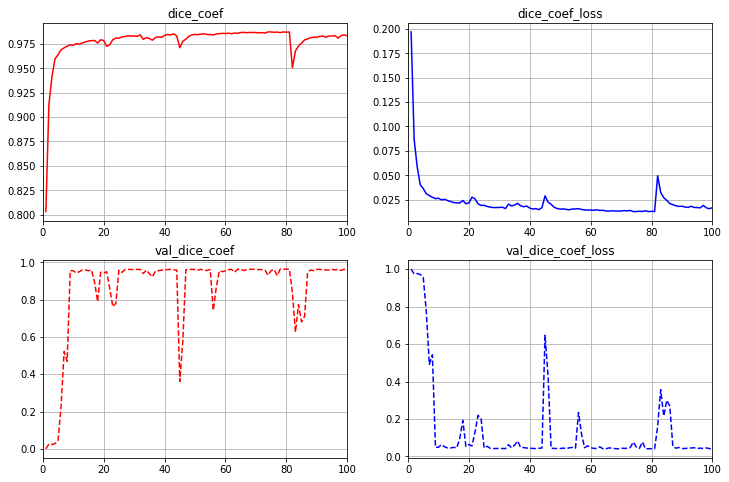

In [6]:
epochs = np.arange(100)+1
plt.figure(figsize=(12,8))
plt.subplot(2,2,1), plt.grid(), plt.plot(epochs, history.history['dice_coef'], 'r')
plt.xlim(0,epochs[-1]), plt.title('dice_coef')

plt.subplot(2,2,2), plt.grid(), plt.plot(epochs, history.history['loss'], 'b')
plt.xlim(0,epochs[-1]), plt.title('dice_coef_loss')

plt.subplot(2,2,3), plt.grid(), plt.plot(epochs, history.history['val_dice_coef'], 'r--')
plt.xlim(0,epochs[-1]), plt.title('val_dice_coef')

plt.subplot(2,2,4), plt.grid(), plt.plot(epochs, history.history['val_loss'], 'b--')
plt.xlim(0,epochs[-1]), plt.title('val_dice_coef_loss')

plt.show()